# Detecting Gaze in using the "Eye Tracking for Everyone" Neural Network

This will go through the process of extracting the features from an image that are needed for the neural network, testing the input, and displaying the output.

## Extracting the Inputs from an Image using OpenCV

The neural network requires as inputs:
* an image of the left eye, (224x224)
* an image of the right eye (224x224)
* an image of the fafce (224x224)
* a 625 array representing where in a 25x25 grid the face is

Here we will use OpenCV to extract this from a single image.  Much of this code is based on the instruction at 
https://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html

In [18]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline
# filter out the warnings
import warnings
warnings.filterwarnings('ignore')
sys.path.insert(0, '../')

from gaze_detector import extract_features_and_detect_gazes
from features import extract_image_features, draw_detected_features
from gaze import test_faces

face detection took 0.037
eye extraction 0.012
eye extraction 0.017
Face and eye extraction took:  0.066s


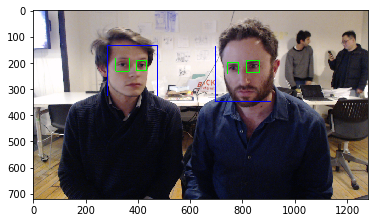

In [19]:
img = cv2.imread('photos/frame-36.png')

img, faces, face_features = extract_image_features(img)

image_copy = np.copy(img)

draw_detected_features(image_copy, faces, face_features)

plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

In [2]:
from lib import crop_image

def set_title_and_hide_axis(title):
    plt.title(title)
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)

def render_face_grid(face_grid):
    to_print = np.copy(face_grid)
    result_image = np.copy(to_print).reshape(25, 25).transpose()
    plt.figure()
    set_title_and_hide_axis('Face grid')
#     print(result_image.shape)
    plt.imshow(result_image)

def show_extraction_results(img, faces, face_features):
    plt.figure(figsize=(10,10))
#     set_title_and_hide_axis('Original image and extracted features')
    image_copy = np.copy(img)

    draw_detected_features(image_copy, faces, face_features)
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB), interpolation="bicubic")

    for i, face in enumerate(faces):
        print('Face #' + str(i))
        #print('i', face, i)
        eyes, face_grid = face_features[i]
        plt.figure()
        set_title_and_hide_axis('Extracted face image')
        plt.imshow(cv2.cvtColor(crop_image(img, face), cv2.COLOR_BGR2RGB), interpolation="bicubic")
        plt.figure()
        #print('face image after extraction')
        render_face_grid(face_grid)

        for i, eye in enumerate(eyes):
            plt.figure()

            if i == 0:  
                set_title_and_hide_axis('Extracted left eye image')
            else:  
                set_title_and_hide_axis('Extracted right eye image')
                
            plt.imshow(cv2.cvtColor(crop_image(img, eye), cv2.COLOR_BGR2RGB), interpolation="bicubic")


def render_gaze_plot(outputs):
    plt.figure(figsize=(10,10))
    circles = []
    circles.append(plt.Circle((0, 0), 0.1, color='b'))

    for output in outputs:
        circles.append(plt.Circle((output[0], output[1]), 0.5, color='r'))

    fig, ax = plt.subplots()
    for circle in circles:
        ax.add_artist(circle)
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_xlabel("Distance from Camera (cm)")
    ax.set_ylabel("Distance from Camera (cm)")
    
    fig.show()

## Load Image, extract face and eye features

Face and eye extraction took:  0.468s
Feeding through the network took 0.488s
Face #0


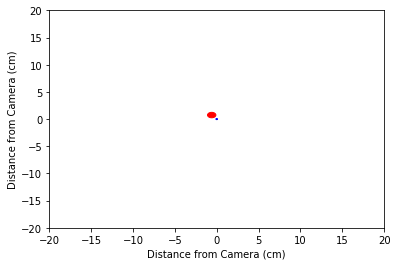

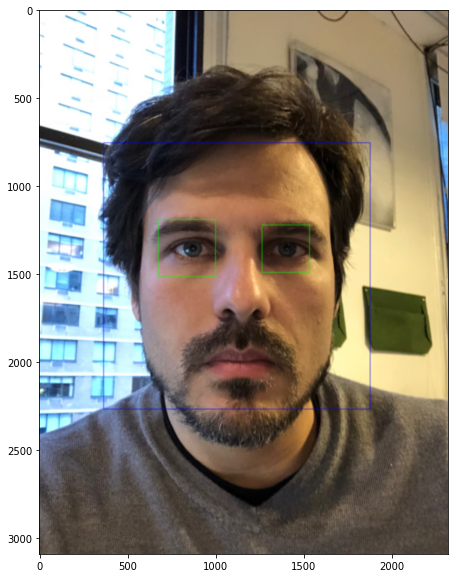

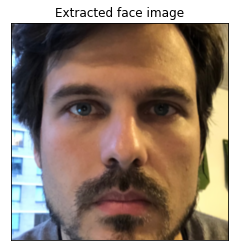

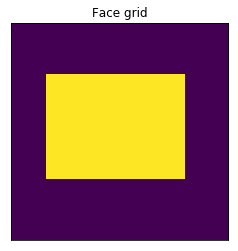

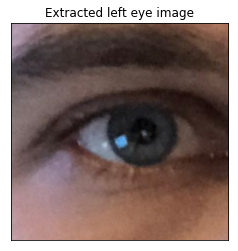

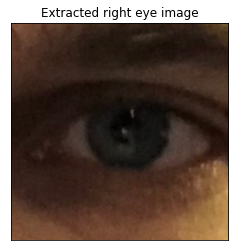

In [6]:
img = cv2.imread('photos/IMG-1053.JPG')
img, faces, face_features = extract_image_features(img)
outputs = test_faces(img, faces, face_features)
render_gaze_plot(outputs)
show_extraction_results(img, faces, face_features)

In [5]:
caffe.set_device(0)
caffe.set_mode_gpu()

Face and eye extraction took:  0.106s
[]


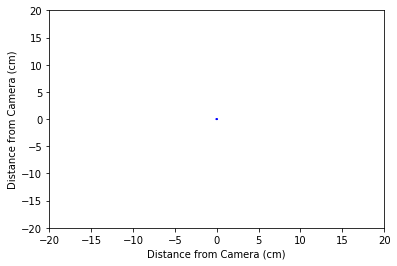

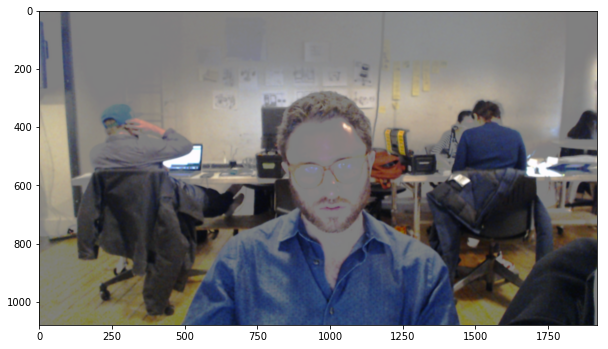

In [29]:
#testing with camera
cap = cv2.VideoCapture(0)
cap.set(3, 1920)
cap.set(4, 1200)

ret, frame = cap.read()
cap.release()

img, faces, face_features = extract_image_features(frame)

outputs = test_faces(frame, faces, face_features)
print(outputs)
render_gaze_plot(outputs)
show_extraction_results(img, faces, face_features)

[array([-3.86226726, -0.56879449], dtype=float32)]


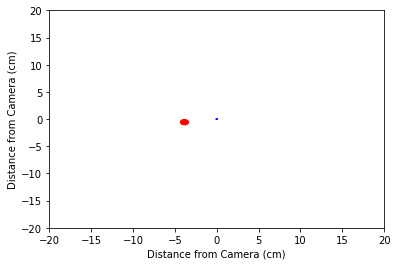

In [47]:


print(outputs)
circles = []
circles.append(plt.Circle((0, 0), 0.1, color='b'))

for output in outputs:
    circles.append(plt.Circle((output[0], output[1]), 0.5, color='r'))


fig, ax = plt.subplots()
for circle in circles:
    ax.add_artist(circle)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_xlabel("Distance from Camera (cm)")
ax.set_ylabel("Distance from Camera (cm)")
fig.show()

# Feeding the Input through the Network

Here we will load the model from https://github.com/CSAILVision/GazeCapture.  We will use the 25x snapshot which is trained to handle variations in the images.

In [5]:
outputs = test_faces(img, faces, face_features)
print("The outputs:", outputs)

Feeding through the network took 3.027s
The outputs: [array([-0.60081178,  0.73898786], dtype=float32)]


## Running on the GPU

In [56]:
# Test performance on CPU
caffe.set_mode_cpu()
outputs = test_faces(faces, face_features)

%timeit test_faces(faces, face_features)

Feeding through the network took 0.543s
Feeding through the network took 0.19s
Feeding through the network took 0.214s
Feeding through the network took 0.214s
Feeding through the network took 0.231s
Feeding through the network took 0.224s
Feeding through the network took 0.197s
Feeding through the network took 0.211s
Feeding through the network took 0.292s
Feeding through the network took 0.269s
Feeding through the network took 0.217s
Feeding through the network took 0.214s
Feeding through the network took 0.195s
Feeding through the network took 0.213s
Feeding through the network took 0.19s
Feeding through the network took 0.211s
Feeding through the network took 0.191s
Feeding through the network took 0.212s
Feeding through the network took 0.189s
Feeding through the network took 0.212s
Feeding through the network took 0.19s
Feeding through the network took 0.213s
Feeding through the network took 0.19s
Feeding through the network took 0.212s
Feeding through the network took 0.19s
Feedi

In [57]:
# run this if cuda enable and gpu has enough memory
caffe.set_mode_gpu()
caffe.set_device(0)  # if we have multiple GPUs, pick the first one

In [58]:
# run once to upload the network to gpu
outputs = test_faces(faces, face_features)

# then timeit
%timeit test_faces(faces, face_features)

Feeding through the network took 0.462s
Feeding through the network took 0.122s
Feeding through the network took 0.118s
Feeding through the network took 0.125s
Feeding through the network took 0.118s
Feeding through the network took 0.12s
Feeding through the network took 0.117s
Feeding through the network took 0.123s
Feeding through the network took 0.118s
Feeding through the network took 0.122s
Feeding through the network took 0.117s
Feeding through the network took 0.12s
Feeding through the network took 0.117s
Feeding through the network took 0.119s
Feeding through the network took 0.117s
Feeding through the network took 0.12s
Feeding through the network took 0.117s
Feeding through the network took 0.12s
Feeding through the network took 0.117s
Feeding through the network took 0.12s
Feeding through the network took 0.116s
Feeding through the network took 0.119s
Feeding through the network took 0.117s
Feeding through the network took 0.121s
Feeding through the network took 0.117s
Feedi

In [6]:
# units in cm
screen_w = 5.58
screen_h = 10.45
screen_aspect = screen_w / screen_h
camera_l = 2.299
camera_t = 0.91
screen_t = 1.719
screen_l = 0.438
phone_w = 6.727
phone_h = 13.844
screen_from_camera = [screen_t - camera_t, screen_l - camera_l]

camera_coords_percentage = [camera_t / phone_h, camera_l / phone_w]

#iphone 8 screen w and screen height from https://www.paintcodeapp.com/news/ultimate-guide-to-iphone-resolutions
screenW = 375
screenH = 667

phone_w_to_screen = phone_w / screen_w
phone_h_to_screen = phone_h / screen_h

In [7]:
def render_gaze(full_image, camera_center, cm_to_px, output):
    xScreen = output[0]
    yScreen = output[1]
    pixelGaze = [round(camera_center[0] - yScreen * cm_to_px), round(camera_center[1] + xScreen * cm_to_px)]
    
    cv2.circle(full_image,(int(pixelGaze[1]), int(pixelGaze[0])), 30, (0, 0, 255), -1)

    
def render_gazes(img, outputs):
    full_image = np.ones((round(img.shape[0] * 2), round(img.shape[1] * 2), 3), dtype=np.uint8)

    full_image_center = [round(full_image.shape[0] * 0.2), round(full_image.shape[1] *.5)]
    camera_center = full_image_center

    cm_to_px = img.shape[0] * 1. / screen_h

    screen_from_camera_px = [round(screen_from_camera[0] * cm_to_px), round(screen_from_camera[1] * cm_to_px)]

    screen_start = [camera_center[0] + screen_from_camera_px[0], camera_center[1] + screen_from_camera_px[1]]
    
    full_image[screen_start[0]:screen_start[0] + img.shape[0], screen_start[1]:screen_start[1] + img.shape[1], :] = img[:, :, :]

    cv2.circle(full_image,(camera_center[1],camera_center[0]), 30, (255, 0, 0), -1)
    
    for output in outputs:
        render_gaze(full_image, camera_center, cm_to_px, output)

    plt.figure(figsize=(10,10))
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    plt.imshow(cv2.cvtColor(full_image, cv2.COLOR_BGR2RGB), interpolation="bicubic")    

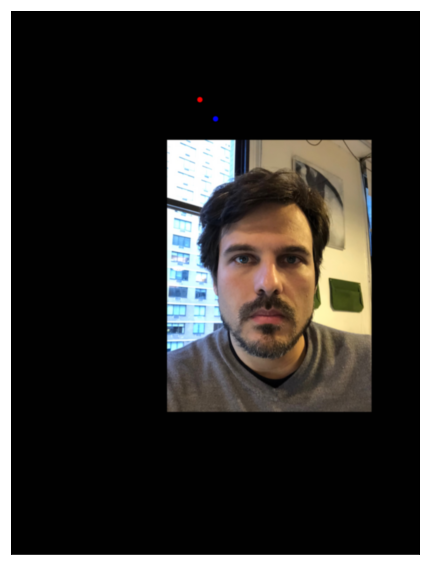

In [8]:
render_gazes(img, outputs)

In [11]:
# lets create a reusable function to extract the features, pass through the network, and render output
def test_and_render(image_path, show_details=False):
    img, faces, face_features = extract_image_features(cv2.imread(image_path))
    outputs = test_faces(img, faces, face_features)

    if show_details:        
        show_extraction_results(img, faces, face_features)

    render_gazes(img, outputs)

Face and eye extraction took:  0.493s
Feeding through the network took 2.128s
Feeding through the network took 2.115s


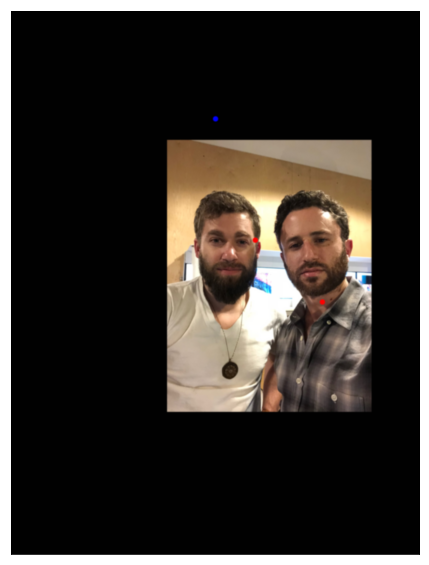

In [12]:
test_and_render('photos/IMG-1066.JPG')

Face and eye extraction took:  0.741s
Feeding through the network took 2.165s


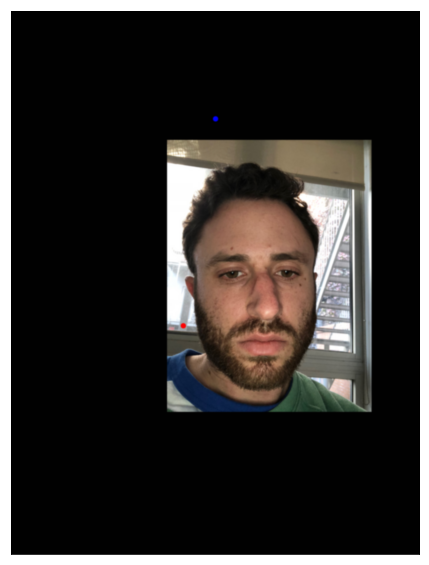

In [13]:
test_and_render('photos/IMG-1036.JPG')

Face and eye extraction took:  0.485s
Feeding through the network took 2.22s


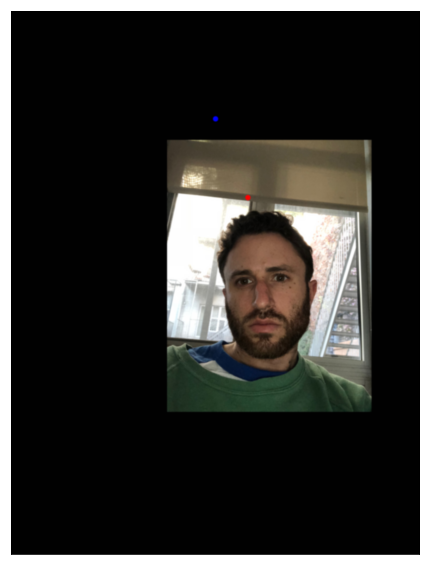

In [14]:
test_and_render('photos/IMG-1037.JPG')

Face and eye extraction took:  0.352s
Feeding through the network took 0.103s


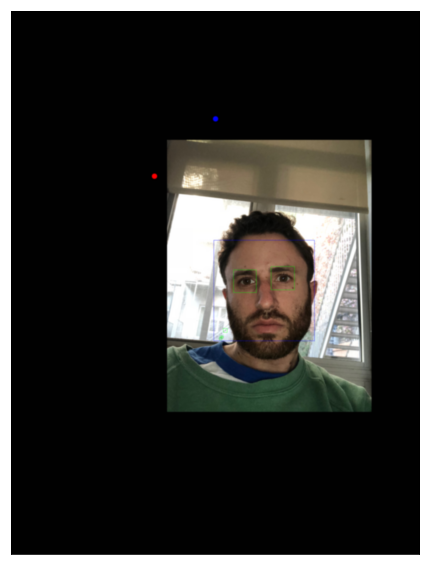

In [28]:
test_and_render('photos/IMG-1038.JPG')

Face and eye extraction took:  0.449s
Feeding through the network took 0.109s


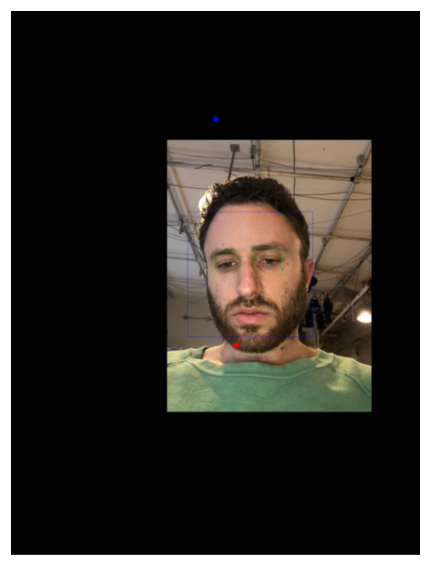

In [29]:
test_and_render('photos/IMG-1044.JPG')

Face and eye extraction took:  0.506s
Feeding through the network took 0.109s


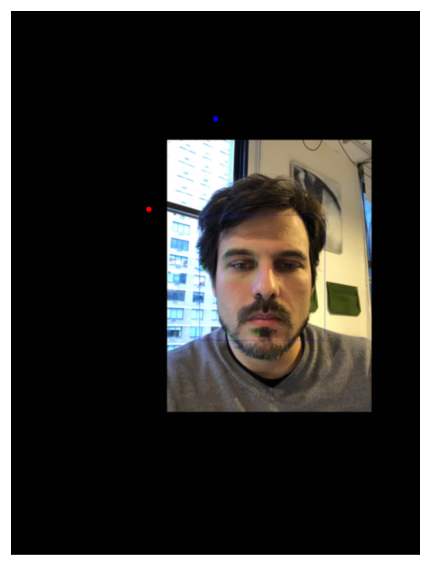

In [30]:
test_and_render('photos/IMG-1052.JPG')

Face and eye extraction took:  0.457s
Feeding through the network took 0.115s


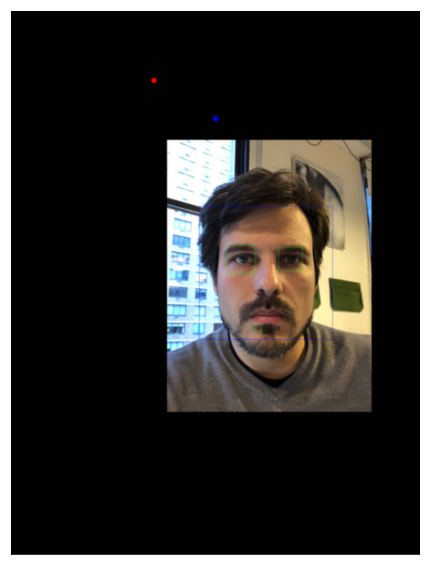

In [31]:
test_and_render('photos/IMG-1053.JPG')

Face and eye extraction took:  0.525s
Feeding through the network took 0.112s


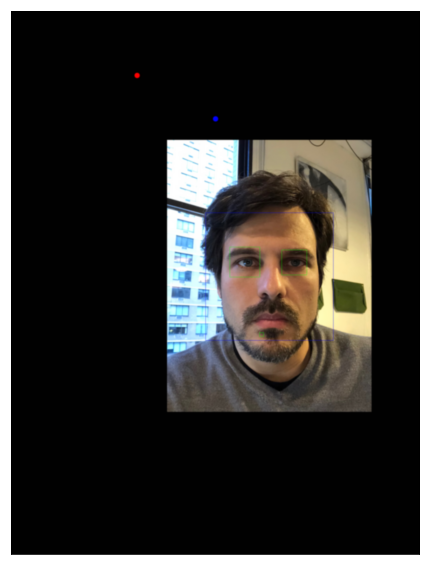

In [32]:
test_and_render('photos/IMG-1054.JPG')

Face and eye extraction took:  0.52s
Feeding through the network took 0.089s


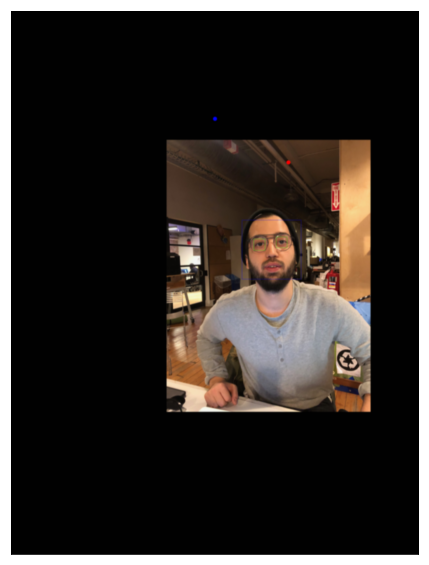

In [33]:
test_and_render('photos/IMG-1055.JPG')